K Sharath ChandASSIGNMENT-2 APPLIED DATA SCIENCE

---



In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [61]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASSIGNMENTS/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


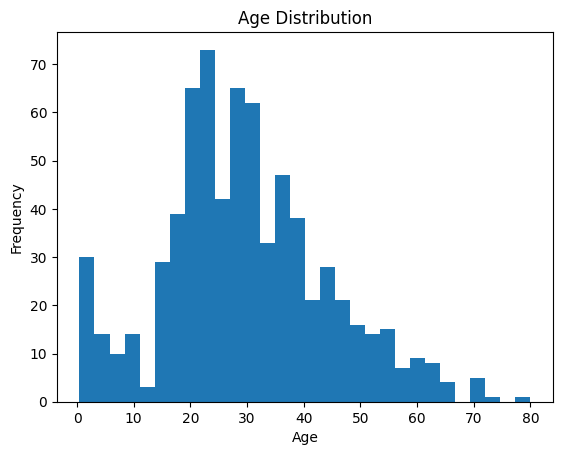

In [62]:
import matplotlib.pyplot as plt

# Example: Histogram for age
plt.hist(df['age'].dropna(), bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


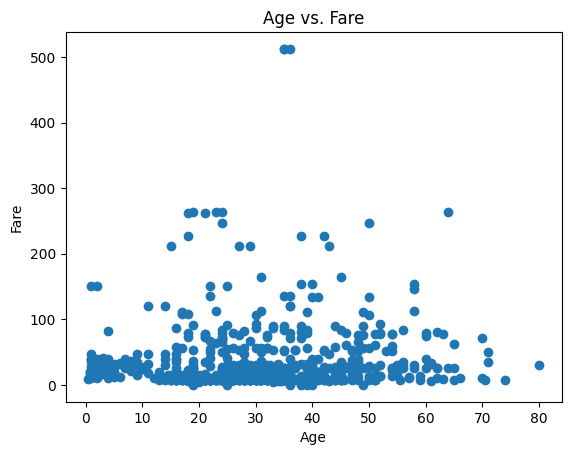

In [63]:
# Drop rows with missing values in 'age' and 'fare'
df_filtered = df[['age', 'fare']].dropna()

# Scatter plot between age and fare
plt.scatter(df_filtered['age'], df_filtered['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()


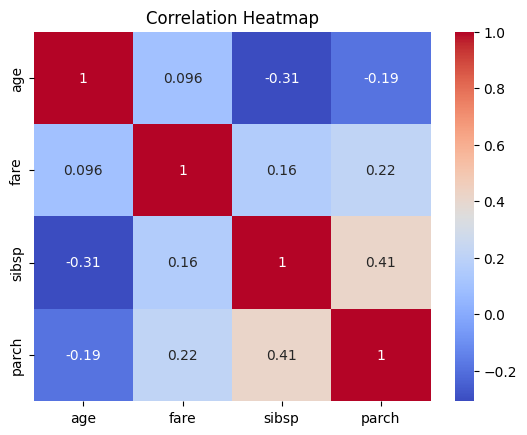

In [64]:
import seaborn as sns

# Example: Heatmap of correlations between numerical variables
corr = df[['age', 'fare', 'sibsp', 'parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [65]:
# Descriptive statistics summary
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
# Check missing values
df.isnull().sum()

# Drop rows with missing values
df.dropna(inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [67]:
# Example: Using Z-score to detect outliers in 'fare' column
from scipy.stats import zscore

z_scores = zscore(df['fare'])
threshold = 3
outliers = df[abs(z_scores) > threshold]
# Replace outliers with median value
df['fare'] = df['fare'].where(~(abs(z_scores) > threshold), df['fare'].median())
df['fare']

1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: fare, Length: 182, dtype: float64

In [68]:
# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

# Perform encoding (e.g., one-hot encoding)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
1,1,1,38.0,1,0,71.2833,False,False,0,0,...,1,0,1,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,False,False,0,0,...,1,0,1,0,0,0,0,0,1,1
6,0,1,54.0,0,0,51.8625,True,True,1,0,...,0,0,0,0,1,0,0,0,1,0
10,1,3,4.0,1,1,16.7000,False,False,0,0,...,0,0,0,0,0,0,1,0,1,1
11,1,1,58.0,0,0,26.5500,False,True,0,0,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,False,False,0,0,...,1,0,0,1,0,0,0,0,1,1
872,0,1,33.0,0,0,5.0000,True,True,1,0,...,0,1,0,0,0,0,0,0,1,0
879,1,1,56.0,0,1,83.1583,False,False,0,0,...,1,0,1,0,0,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,False,True,0,0,...,1,1,0,0,0,0,0,0,1,1


In [69]:
X = df_encoded.drop('survived', axis=1)  # Independent variables
y = df_encoded['survived']  # Dependent variable
X


,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
1,1,38.0,1,0,71.2833,False,False,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,False,False,0,0,1,...,1,0,1,0,0,0,0,0,1,1
6,1,54.0,0,0,51.8625,True,True,1,0,1,...,0,0,0,0,1,0,0,0,1,0
10,3,4.0,1,1,16.7000,False,False,0,0,1,...,0,0,0,0,0,0,1,0,1,1
11,1,58.0,0,0,26.5500,False,True,0,0,1,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,False,False,0,0,1,...,1,0,0,1,0,0,0,0,1,1
872,1,33.0,0,0,5.0000,True,True,1,0,1,...,0,1,0,0,0,0,0,0,1,0
879,1,56.0,0,1,83.1583,False,False,0,0,0,...,1,0,1,0,0,0,0,0,0,1
887,1,19.0,0,0,30.0000,False,True,0,0,1,...,1,1,0,0,0,0,0,0,1,1


In [70]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 182, dtype: int64

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.37341964,  0.15208196,  0.82857574, ..., -0.10540926,
        -1.31012133,  0.69258559],
       [-0.37341964, -0.03987502,  0.82857574, ..., -0.10540926,
         0.76328808,  0.69258559],
       [-0.37341964,  1.17585249, -0.72607153, ..., -0.10540926,
         0.76328808, -1.44386487],
       ...,
       [-0.37341964,  1.30382381, -0.72607153, ..., -0.10540926,
        -1.31012133,  0.69258559],
       [-0.37341964, -1.06364555, -0.72607153, ..., -0.10540926,
         0.76328808,  0.69258559],
       [-0.37341964, -0.61574594, -0.72607153, ..., -0.10540926,
        -1.31012133,  0.69258559]])

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train


array([[-0.37341964,  0.63197439, -0.72607153, ..., -0.10540926,
         0.76328808, -1.44386487],
       [-0.37341964, -0.42378897,  0.82857574, ..., -0.10540926,
         0.76328808, -1.44386487],
       [ 1.56836251, -2.08741609,  0.82857574, ..., -0.10540926,
         0.76328808,  0.69258559],
       ...,
       [-0.37341964,  0.72795288, -0.72607153, ..., -0.10540926,
         0.76328808, -1.44386487],
       [-0.37341964,  1.30382381, -0.72607153, ..., -0.10540926,
        -1.31012133,  0.69258559],
       [-0.37341964,  0.02411064, -0.72607153, ..., -0.10540926,
         0.76328808,  0.69258559]])

In [73]:
X_test


array([[-0.37341964, -0.74371726, -0.72607153,  0.69247206,  2.84074696,
         1.04496604, -0.8660254 ,  0.96755889, -0.10540926, -1.31012133,
        -0.29970045, -0.24112141,  1.04496604, -0.90553851,  1.79793163,
        -0.6239495 , -0.45309824, -0.44426166, -0.25362864, -0.14990634,
        -0.10540926, -1.31012133, -1.44386487],
       [ 3.51014466, -0.42378897,  0.82857574,  0.69247206, -1.03831111,
        -0.9569689 , -0.8660254 , -1.03352882, -0.10540926,  0.76328808,
        -0.29970045,  4.14728827, -0.9569689 ,  1.10431526, -0.55619468,
        -0.6239495 , -0.45309824, -0.44426166, -0.25362864,  6.67083203,
        -0.10540926,  0.76328808, -1.44386487],
       [-0.37341964, -0.93567424,  2.38322301,  2.01910276,  3.08381081,
        -0.9569689 , -0.8660254 , -1.03352882, -0.10540926, -1.31012133,
        -0.29970045, -0.24112141, -0.9569689 ,  1.10431526,  1.79793163,
        -0.6239495 , -0.45309824, -0.44426166, -0.25362864, -0.14990634,
        -0.10540926, -1.3101

In [74]:
y_test


118    0
251    0
742    1
496    1
712    1
96     0
139    0
337    1
572    1
487    0
486    1
765    1
340    1
550    1
262    0
97     1
291    1
627    1
492    0
307    1
857    1
599    1
707    1
183    1
54     0
609    1
318    1
110    0
789    0
701    1
835    1
305    1
456    0
430    1
332    0
177    0
585    1
Name: survived, dtype: int64

In [75]:
y_train

331    0
336    0
193    1
75     0
248    1
      ..
523    1
92     0
462    0
879    1
512    1
Name: survived, Length: 145, dtype: int64